In [1]:
from pathlib import Path 

from training_raster_clipper.core.application import execute
from training_raster_clipper.core.models import TrainingConfiguration, TrainingFunctions 


config = TrainingConfiguration(
    verbose = True,
    show_plots = True, 
    resolution = 60,
    band_names = ("B04", "B03", "B02", "B8A"),
    raster_input_path = Path(
        "D:/PROFILS/ESCHALK/DOWNLOADS/S2A_MSIL2A_20221116T105321_N0400_R051_T31TCJ_20221116T170958/S2A_MSIL2A_20221116T105321_N0400_R051_T31TCJ_20221116T170958.SAFE"
    ),
    polygons_input_path = (Path(".").resolve().parent / Path("resources/solution/polygons.geojson")),
    csv_output_path = (Path(".").resolve().parent / Path("generated/classified_points.csv")),
    raster_output_path=(Path(".").resolve().parent / Path("generated/sklearn_raster.tiff")),
    implementation_name="eschalk",
)
config

TrainingConfiguration(verbose=True, show_plots=True, resolution=60, band_names=('B04', 'B03', 'B02', 'B8A'), raster_input_path=WindowsPath('D:/PROFILS/ESCHALK/DOWNLOADS/S2A_MSIL2A_20221116T105321_N0400_R051_T31TCJ_20221116T170958/S2A_MSIL2A_20221116T105321_N0400_R051_T31TCJ_20221116T170958.SAFE'), polygons_input_path=WindowsPath('D:/Profils/eschalk/dev/playground/python/training/training-raster-clipper/resources/solution/polygons.geojson'), csv_output_path=WindowsPath('D:/Profils/eschalk/dev/playground/python/training/training-raster-clipper/generated/classified_points.csv'), raster_output_path=WindowsPath('D:/Profils/eschalk/dev/playground/python/training/training-raster-clipper/generated/sklearn_raster.tiff'), implementation_name='eschalk')

In [2]:
from training_raster_clipper.implementation.eschalk import (
    load_feature_polygons,
    load_sentinel_data,
    rasterize_geojson,
    produce_clips,
    persist_to_csv,
    classify_sentinel_data,
    persist_classification_to_raster,
)

functions = TrainingFunctions(
    load_feature_polygons=load_feature_polygons,
    load_sentinel_data=load_sentinel_data,
    rasterize_geojson=rasterize_geojson,
    produce_clips=produce_clips,
    persist_to_csv=persist_to_csv,
    classify_sentinel_data=classify_sentinel_data,
    persist_classification_to_raster=persist_classification_to_raster,
)
functions

TrainingFunctions(load_feature_polygons=<function load_feature_polygons at 0x000001A6B2A9FB50>, load_sentinel_data=<function load_sentinel_data at 0x000001A6E434E8C0>, rasterize_geojson=<function rasterize_geojson at 0x000001A6E5CFC550>, produce_clips=<function produce_clips at 0x000001A6E5CFD090>, persist_to_csv=<function persist_to_csv at 0x000001A6E5CFD120>, classify_sentinel_data=<function classify_sentinel_data at 0x000001A6E5CFD1B0>, persist_classification_to_raster=<function persist_classification_to_raster at 0x000001A6E5CFD240>)

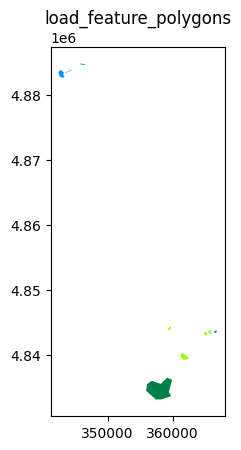

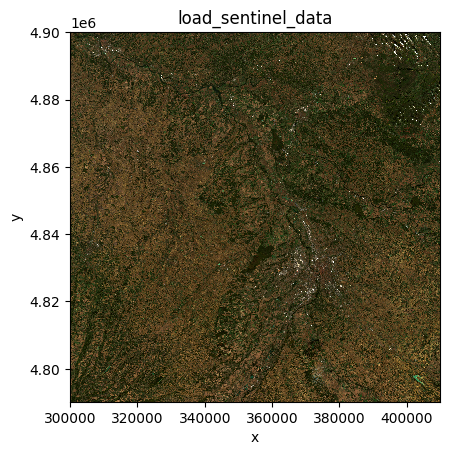

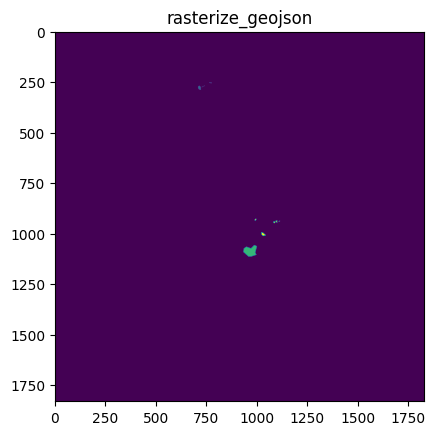

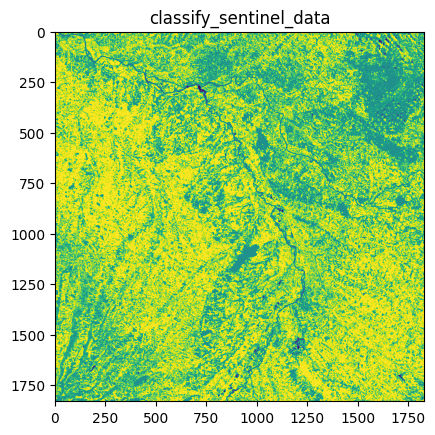

In [3]:
execute(config, functions)